In [163]:
#Analise de dados de celulares roubados registrados 
#pelo departamento da DEINTER de São José dos Campos 
#de Janeiro de 2018 à Abril de 2019.
#Utilizando as informações cedidas pelo portal de transparencia do governo do estado de São Paulo 
#é possivel evidenciar as regiões com maiores indices de roubo de celulares 
#e assim aplicar uma solução de segurança. 
#Projeto elaborado para a materia de Graduação de Projeto de Banco de Dados Não Estruturados na FATEC de São José dos Campos.

import pandas as pd
from pandas import Series, DataFrame
import folium
from folium import plugins
import seaborn as sb
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [164]:
path = 'datasets/'
filenames = {'2018_1', '2018_2', '2018_3', '2018_4', '2018_5', '2018_6', '2018_7', '2018_8', '2018_9', '2018_10', '2018_11', '2018_12', '2019_1', '2019_2', '2019_3', '2019_4'}
extension = '.xls'

In [165]:
#Função para percorrer os arquivos de dados e popular o dataframe.
def populaDataFrame():
    dfList = list()

    for file in filenames:
        df= pd.DataFrame(pd.read_csv((path+file+extension), sep='\t', encoding='UTF-16 LE'))
        dfList.append(df)

    df = pd.concat(dfList)
    return df

In [166]:
df = populaDataFrame()
df.reset_index()
df.shape
#Quantidade de linhas e colunas no dataframe.

(11638, 54)

In [167]:
df.sample(10)
#10 linhhas aleatórias e seus dados.

ANO_BO  NUM_BO NUMERO_BOLETIM          BO_INICIADO           BO_EMITIDO  \
303    2018     840       840/2018  16/03/2018 02:52:44  16/03/2018 03:07:17   
24     2018    2347      2347/2018  01/10/2018 17:58:17  01/10/2018 18:06:12   
260    2018    1579      1579/2018  14/03/2018 22:05:54  15/03/2018 03:11:27   
16     2018     735       735/2018  01/03/2018 22:04:39  01/03/2018 22:53:49   
396    2018  775439    775439/2018  17/06/2018 13:29:15  17/06/2018 13:29:15   
431    2018     939       939/2018  21/03/2018 15:55:19  21/03/2018 16:15:16   
55     2019      31        31/2019  02/01/2019 22:53:25  03/01/2019 07:36:02   
186    2018    1828      1828/2018  08/11/2018 10:52:17  08/11/2018 17:06:01   
590    2018     658       658/2018  17/02/2018 20:10:38  17/02/2018 20:22:49   
88     2019      17        17/2019  03/01/2019 23:10:14  04/01/2019 02:54:41   

    DATAOCORRENCIA PERIDOOCORRENCIA DATACOMUNICACAO       DATAELABORACAO  \
303     15/03/2018          A NOITE      16/03/2018  16/03/2018 02:52:44   
24      12/09/2018     DE MADRUGADA      01/10/2018  01/10/2018 17:58:17   
260     14/03/2018       PELA MANHÃ      14/03/2018  14/03/2018 22:05:54   
16      01/03/2018          A NOITE      01/03/2018  01/03/2018 22:04:39   
396     16/06/2018     DE MADRUGADA      17/06/2018  17/06/2018 13:29:15   
431     10/03/2018          A NOITE      21/03/2018  21/03/2018 15:55:19   
55      02/01/2019          A NOITE      02/01/2019  02/01/2019 22:53:25   
186     07/11/2018          A NOITE      08/11/2018  08/11/2018 10:52:17   
590     17/02/2018          A TARDE      17/02/2018  17/02/2018 20:10:38   
88      03/01/2019          A NOITE      03/01/2019  03/01/2019 23:10:14   

       BO_AUTORIA FLAGRANTE NUMERO_BOLETIM_PRINCIPAL  \
303  Desconhecida       Não        839/2018 - 130508   
24   Desconhecida       Não       2172/2018 - 130324   
260  Desconhecida       Não                      NaN   
16   Desconhecida       Não                      NaN   
396  Desconhecida       Não                      NaN   
431  Desconhecida       Não                      NaN   
55      Conhecida       Sim                      NaN   
186  Desconhecida       Não                      NaN   
590  Desconhecida       Não                      NaN   
88      Conhecida       Não                      NaN   

                                   LOGRADOURO  NUMERO                 BAIRRO  \
303                              RUA JANUARIA  1100.0      CHÁCARAS REUNIDAS   
24                                        NaN     0.0                    NaN   
260         RODOVIA PRESIDENTE DUTRA (BR 116)    57.0    JARDIM VISTA ALEGRE   
16                     AVENIDA GENERAL MOTORS     0.0          VILA TATETUBA   
396            avenida dr. arthur costa filho   681.0                 centro   
431                 RUA PADRE ATALIBA PEREIRA    63.0             VILA PRADO   
55                          RUA DOS FERREIROS    59.0  PARQUE NOVO HORIZONTE   
186                                       NaN     0.0                    NaN   
590                      RUA FREDERICO OZANAN     0.0                 CENTRO   
88   AVENIDA DOUTOR ARIBERTO PEREIRA DA CUNHA     1.0     PORTAL DAS COLINAS   

                CIDADE   UF           LATITUDE          LONGITUDE  \
303  S.JOSE DOS CAMPOS   SP  -23,2551007797508   -45,932902773694   
24                 NaN  NaN                NaN                NaN   
260      GUARATINGUETA   SP  -22,7734955189999      -45,136814853   
16   S.JOSE DOS CAMPOS   SP       -23,17938677      -45,840781679   
396      CARAGUATATUBA   SP  -23,6222542629999      -45,408424672   
431           CACAPAVA   SP  -23,0958718847611  -45,7114063567313   
55   S.JOSE DOS CAMPOS   SP  -23,1979849307733    -45,78833933568   
186                NaN  NaN                NaN                NaN   
590            TAUBATE   SP      -23,023591822      -45,548025535   
88       GUARATINGUETA   SP      -22,803402391      -45,186049692   

                 DESCRICAOLOC

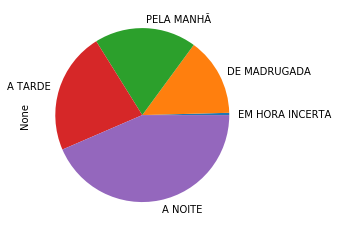

In [168]:
df.groupby('PERIDOOCORRENCIA').size().sort_values().plot(kind='pie')
#Gráfico de pizza com os períodos de ocorrência dos roubos de celulares.

In [169]:
df['PERIDOOCORRENCIA'].value_counts().to_frame()
#Dados quantitativos com os períodos de ocorrência dos roubos de celulares.

PERIDOOCORRENCIA
A NOITE                      5064
A TARDE                      2631
PELA MANHÃ                   2206
DE MADRUGADA                 1688
EM HORA INCERTA                49

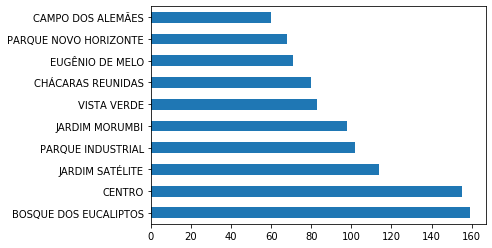

In [170]:
df.query('CIDADE == "S.JOSE DOS CAMPOS"')['BAIRRO'].value_counts().head(10).plot(kind='barh')
#Gráfico de barras horizontais contendo os bairros de SJC com mais ocorrência dos roubos de celulares.

In [171]:
df.query('CIDADE == "S.JOSE DOS CAMPOS"')['BAIRRO'].value_counts().to_frame().head(10)
#Dados quantitativos contendo os bairros de SJC com mais ocorrência dos roubos de celulares.

BAIRRO
BOSQUE DOS EUCALIPTOS     159
CENTRO                    155
JARDIM SATÉLITE           114
PARQUE INDUSTRIAL         102
JARDIM MORUMBI             98
VISTA VERDE                83
CHÁCARAS REUNIDAS          80
EUGÊNIO DE MELO            71
PARQUE NOVO HORIZONTE      68
CAMPO DOS ALEMÃES          60

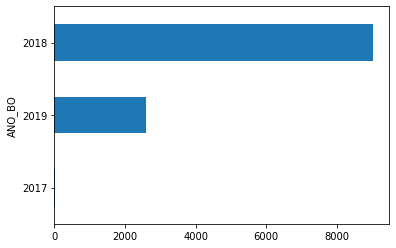

In [172]:
df.groupby('ANO_BO').size().sort_values().plot(kind='barh')
#Gráfico de barras horizontais contendo a quantidade de BO's por ano de SJC sos roubos de celulares.

In [173]:
df['ANO_BO'].value_counts().to_frame()
#Dados quantitativos contendo a quantidade de BO's por ano de SJC sos roubos de celulares.

ANO_BO
2018    9034
2019    2603
2017       1

In [174]:
df2019_4= pd.DataFrame(pd.read_csv((path+"2019_4"+extension), sep='\t', encoding='UTF-16 LE'))
df2019_4.shape
#Populando o dataframe com o arquivo de dados de 2019-4 e exibindo a quantidade de linhas e colunas.

(623, 54)

In [175]:
geolocalizacoes = df2019_4[['LATITUDE', 'LONGITUDE', 'PERIDOOCORRENCIA']].copy()
geolocalizacoes.isnull().sum()
#Copiando o dataframe com as informações que iremos utilizar e exibindo a quantidade de campos nulos.

LATITUDE            71
LONGITUDE           71
PERIDOOCORRENCIA     0
dtype: int64

In [176]:
geolocalizacoes.dropna(inplace=True)
geolocalizacoes.isnull().sum()
#Removendo os campos nulos e exibindo novamente a quantidade de campos nulos.

LATITUDE            0
LONGITUDE           0
PERIDOOCORRENCIA    0
dtype: int64

In [185]:
#from IPython.display import HTML, display
from IPython.core.display import display, HTML

coordenadas = []
lat = geolocalizacoes['LATITUDE'].values

long = geolocalizacoes['LONGITUDE'].values

periodo = geolocalizacoes['PERIDOOCORRENCIA'].values

colors = {
 'DE MADRUGADA': 'blue',
 'PELA MANHÃ': 'green',
 'A TARDE': 'orange',
 'A NOITE': 'red',
 'EM HORA INCERTA': 'purple',
}

mapa = folium.Map(location=[-23.1791, -45.8872],tiles='OpenStreetMap',zoom_start=10)
cont = 0
for la,lo,p in zip(lat,long,periodo):
    folium.Marker(
        location=[float(la.replace(",", ".")), float(lo.replace(",", "."))],
        icon=folium.Icon(color=colors[p])
    ).add_to(mapa)

#mapa
#mapa._repr_html_()
#mapa.get_root().render()
display(HTML(mapa._repr_html_()))
#display(HTML('<iframe src=' + mapa._repr_html_() + ' width=100% height=1000></iframe>'))

#Através da biblioteca do Folium criamos um novo mapa, marcamos os roubos de celulares de abril 2019
#com as latitudes e longitudes do dataframe e definimos a cor do marcador através do período de ocorrência.

In [178]:
geolocalizacoes = df[['LATITUDE', 'LONGITUDE', 'PERIDOOCORRENCIA']].copy()
geolocalizacoes.isnull().sum()
#Copiando o dataframe com as informações que iremos utilizar e exibindo a quantidade de campos nulos.

LATITUDE            1748
LONGITUDE           1748
PERIDOOCORRENCIA       0
dtype: int64

In [179]:
geolocalizacoes.dropna(inplace=True)
geolocalizacoes.isnull().sum()
#Removendo os campos nulos e exibindo novamente a quantidade de campos nulos.

LATITUDE            0
LONGITUDE           0
PERIDOOCORRENCIA    0
dtype: int64

In [180]:
coordenadas = []
lat = geolocalizacoes['LATITUDE'].values

long = geolocalizacoes['LONGITUDE'].values

mapa = folium.Map(location=[-23.1791, -45.8872],tiles='OpenStreetMap',zoom_start=10)
 
for la,lo in zip(lat,long):
    coordenadas.append([float(la.replace(",", ".")),float(lo.replace(",", "."))])
    
mapa.add_child(plugins.HeatMap(coordenadas))
#Através da biblioteca do Folium criamos um novo mapa e populamos ele com as latitudes e longitudes do dataframe
#Utilizando um mapa de calor marcamos os pontos de roubos de celulares de janeiro de 2018 à  abril 2019